In [1]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv('../../data/merged_cleaned_data/deaths_merged_data_svi_pct_cols.csv')
df.head()

,Unnamed: 0,FIPS,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths
0,0,1001,15.4,4.2,29372.0,11.3,14.6,24.2,19.3,7.5,...,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,85.0,99
1,1,1009,14.4,4.1,22656.0,19.8,17.8,23.4,14.2,7.0,...,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,40.0,131
2,2,1013,23.5,6.7,20430.0,15.4,19.0,22.8,17.7,10.5,...,78.563680,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,94.0,66
3,3,1015,18.6,8.8,24706.0,15.9,16.8,21.9,20.8,10.4,...,79.439032,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,552.0,305
4,4,1017,16.6,5.0,22827.0,18.6,18.9,20.7,16.7,9.7,...,76.995358,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,115.0,117


In [3]:
#set index to FIPS
df = df.set_index(df['FIPS'])
df= df.drop(['FIPS','Unnamed: 0'], axis=1)

In [4]:
#create variable for case% for each counties population
df['case_pct'] = df['first_year_deaths']/df['E_TOTPOP']*100
df['case_pct'].head()

FIPS
1001    0.179348
1009    0.227253
1013    0.329588
1015    0.264992
1017    0.345888
Name: case_pct, dtype: float64

In [5]:
df['case_pct'].describe()

count    3058.000000
mean        0.187585
std         0.108421
min         0.000000
25%         0.112688
50%         0.173362
75%         0.242428
max         0.788566
Name: case_pct, dtype: float64

In [6]:
# # bin and cut the case_pct column into 2 classifications
# # q = df['case_pct'].quantile(.75)
# q = df['case_pct'].quantile(.9)
# bins = [0, q , 40]
# labels = ['low','high']
# df['case_class'] = pd.cut(df['case_pct'], bins, labels = labels)
# df['case_class']

FIPS
1001      low
1009      low
1013     high
1015      low
1017     high
         ... 
48131    high
48505     low
48507    high
48127     low
48247     low
Name: case_class, Length: 3058, dtype: category
Categories (2, object): ['low' < 'high']

In [7]:
# df['case_class'].value_counts()

low     2694
high     306
Name: case_class, dtype: int64

In [8]:
#drop unneeded columns
# df = df.drop('case_pct', axis =1)
# df

,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,...,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths,case_class
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,15.4,4.2,29372.0,11.3,14.6,24.2,19.3,7.5,25.0,0.8,...,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,85.0,99,low
1009,14.4,4.1,22656.0,19.8,17.8,23.4,14.2,7.0,12.9,1.7,...,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,40.0,131,low
1013,23.5,6.7,20430.0,15.4,19.0,22.8,17.7,10.5,48.1,0.5,...,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,94.0,66,high
1015,18.6,8.8,24706.0,15.9,16.8,21.9,20.8,10.4,27.5,1.0,...,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,552.0,305,low
1017,16.6,5.0,22827.0,18.6,18.9,20.7,16.7,9.7,44.2,0.1,...,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,115.0,117,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131,25.6,10.6,17864.0,32.9,17.8,26.1,26.2,15.8,90.9,5.7,...,78.895880,76.629575,60.576045,73.670302,64.571017,68.007770,50.959826,0.0,39,high
48505,39.5,11.0,17228.0,40.0,13.9,33.6,17.3,17.1,95.7,24.4,...,79.572483,74.378252,77.443239,76.386871,74.001471,73.609838,47.134744,0.0,30,low
48507,34.8,8.4,13350.0,38.0,13.7,29.5,23.3,16.1,95.0,8.0,...,76.024682,75.848196,76.967659,77.303576,70.010162,71.121990,65.403060,0.0,40,high


In [9]:
# #turn case % classifications into binary 
# df = pd.get_dummies(df, columns = ['case_class'])
# df

,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,...,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,15.4,4.2,29372.0,11.3,14.6,24.2,19.3,7.5,25.0,0.8,...,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,85.0,99,1,0
1009,14.4,4.1,22656.0,19.8,17.8,23.4,14.2,7.0,12.9,1.7,...,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,40.0,131,1,0
1013,23.5,6.7,20430.0,15.4,19.0,22.8,17.7,10.5,48.1,0.5,...,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,94.0,66,0,1
1015,18.6,8.8,24706.0,15.9,16.8,21.9,20.8,10.4,27.5,1.0,...,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,552.0,305,1,0
1017,16.6,5.0,22827.0,18.6,18.9,20.7,16.7,9.7,44.2,0.1,...,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,115.0,117,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131,25.6,10.6,17864.0,32.9,17.8,26.1,26.2,15.8,90.9,5.7,...,76.629575,60.576045,73.670302,64.571017,68.007770,50.959826,0.0,39,0,1
48505,39.5,11.0,17228.0,40.0,13.9,33.6,17.3,17.1,95.7,24.4,...,74.378252,77.443239,76.386871,74.001471,73.609838,47.134744,0.0,30,1,0
48507,34.8,8.4,13350.0,38.0,13.7,29.5,23.3,16.1,95.0,8.0,...,75.848196,76.967659,77.303576,70.010162,71.121990,65.403060,0.0,40,0,1


## RF Regressor

In [5]:
df.shape

(3058, 66)

In [6]:
# Define feature set (x)
X = df.drop(['first_year_deaths'], axis=1).values

#Define (y)
y= df['case_pct'].values

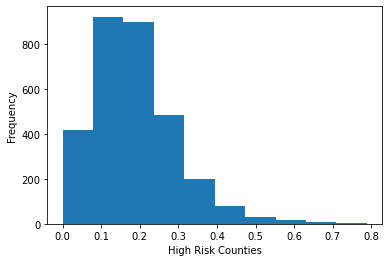

In [8]:
# frequency histogram to see how many counties are high risk and low risk
plt.hist(df["case_pct"])
plt.xlabel("High Risk Counties")
plt.ylabel("Frequency")
plt.show()

In [9]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 78) 

In [10]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2140, 65)
(918, 65)
(2140,)
(918,)


In [11]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [17]:
# from pprint import pprint
# # Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [18]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [150, 355, 561, 766, 972, 1177, 1383, 1588, 1794, 2000]}


In [19]:
# from sklearn.model_selection import RandomizedSearchCV

# # Use the random grid to search for best hyperparameters
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [37]:
# #view best parameters 
# rf_random.best_params_

{'n_estimators': 1794,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [44]:
# # to ignore division errors for zeros
# np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [13]:
#check zeros in y_test
zeros = np.where(y_test ==0)
print(zeros)

(array([ 31,  76, 161, 287, 312, 323, 344, 355, 369, 384, 467, 477, 518,
       593, 693, 743, 794, 832, 845, 858, 886]),)


In [21]:
#check for zeros
n_zeros= zeros[0].size
print (n_zeros)

843


In [14]:
# evaluate random search 


def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test_scaled)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / len(y_test))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test_scaled, y_test)

Model Performance
Average Error: 0.0003 degrees.
Accuracy = 100.00%.


In [23]:
# # evaluate performance with best_random estimator
# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, X_test_scaled, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [80]:
# # print the improvement 
# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 0.00%.


In [22]:
pd.DataFrame(base_model.predict(X_test_scaled))

,0
0,0.021756
1,0.140952
2,0.201785
3,0.198000
4,0.222266
...,...
913,0.126767
914,0.127483
915,0.252766
916,0.112597


In [23]:
pd.DataFrame(y_test)

,0
0,0.021879
1,0.140795
2,0.201830
3,0.198012
4,0.222217
...,...
913,0.126377
914,0.127478
915,0.252817
916,0.112599
